# ASAF Peak Finder Help

First we have to create the maps

## Creating the Maps

The inject_map2 function creates noise and injected maps for a given Fisher matrix and its diagonalized version. The size of the Fisher matrix fixes the $N_{\rm nside}$. The input parameters are:

Parameters
----------
* fisher : The full Fisher matrix for the frequency we want to make injected maps.
         We use the same Fisher matrix for all realisations of noise. 
         Shape = npix X npix
         
* fisher_diag : Diagonalised fisher matrix. 
            We use the same Fisher diagonal for all realisations of noise. Shape = npix
            
* pix_inj : If we want to do only one injection and the same one in each map then
          Shape = 1, else Shape = Ninj X Nmaps. MUST be a numpy array
          
* snr_inj : If we want to do only one injection and the same one in each map then
    Shape = 1, else Shape = Ninj X Nmaps. MUST be a numpy array
    
* nmaps : no. of maps we want to generate

* ret_noise: Whether to return noise maps or not

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import h5py

from ASAF_lib import projscatter2, get_o1neighbours, get_peaks_new, inject_map2

In [13]:
#Parameters
nmaps = 1000 #No of noise realisations
nside = 16

f = 100 #Frequency of maps
snr_inj = np.array([3.0]) #SNR of injection, must be numpy array
idx_inj = np.array([1440]) #Direction of injection, must be numpy array

#Load the Fisher matrix from the PyStoch code
data2 = h5py.File('Fisher_full_corrected_O3_HL_'+str(nside)+'_' + str(f) +'.0Hz.hdf5', 'r')
fisher_diag = data2['fisher_diag'][:]
fisher = data2['fisher_full'][:]
data2.close()


#Creating the maps
inj_maps, noise_maps = inject_map2(fisher, fisher_diag, idx_inj, snr_inj, nmaps, ret_noise=True)
    

## Peak Finder

To run the peak finder code, use the get_peaks_new function from the library (ASAF_lib.py). It requires two arguments: the map where you want to find the peaks and a neighbors array, which is a list of lists. The ith list contains healpy indices of all the neighbors of the ith pixel on the map. We use the get_o1neighbours function, as it gets the indices of nearest neighbours of each pixel. If we wanted next to nearest neighbours, we'll use the get_o2neighbours function, and so on. 

In [7]:
#Neighbours array
o1_neighbours = get_o1neighbours(nside)


#Let's find the peaks in the first maps
N_peaks = get_peaks_new(noise_maps[0,:], o1_neighbours) 
D_peaks = get_peaks_new(inj_maps[0, :], o1_neighbours)


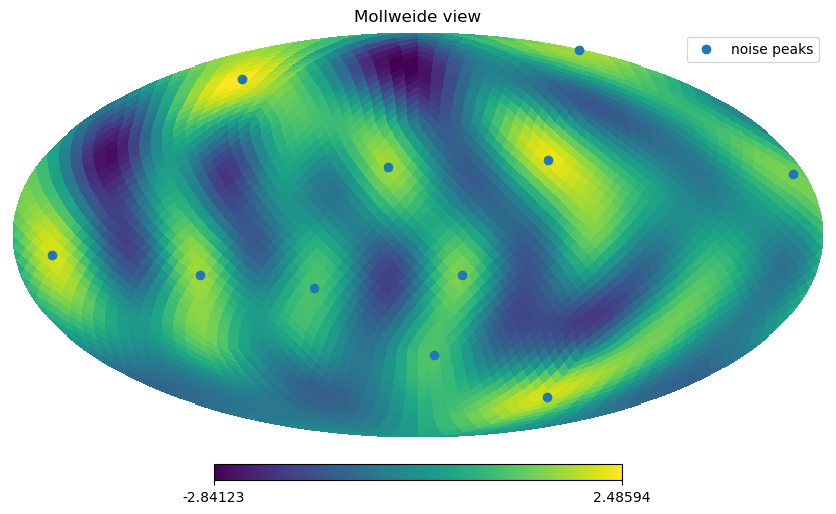

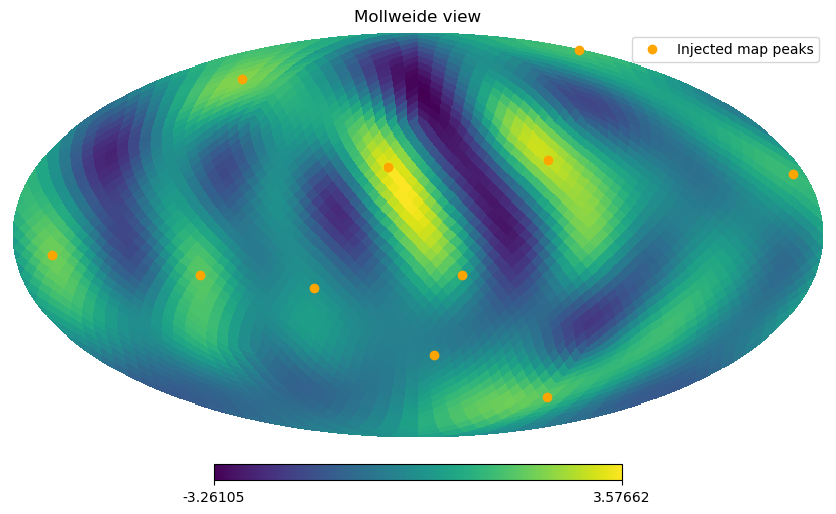

In [12]:
hp.mollview(noise_maps[0,:])
projscatter2(N_peaks, nside, label = 'noise peaks')
plt.legend()

hp.mollview(inj_maps[0,:])
projscatter2(N_peaks, nside, c='orange', label = 'Injected map peaks')
plt.legend()

If you want to find the peaks in more than one map, pass the get_peaks_new function inside a loop.